In [1]:
# Loading the IRIS dataset from sklearn
from sklearn.datasets import load_iris

#Loading random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

#loading pandas
import pandas as pd

#loading numpy
import numpy as np

#setting random seed
np.random.seed(0)

from sklearn.model_selection import train_test_split
#from sklearn.tree import random
from sklearn.metrics import accuracy_score
from sklearn import tree

#For decision tree viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
#loading IRIS data
iris=load_iris()
#creating dataframe to view iris dataset
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#adding target column species(converting numerical values to categorical)
df['species']= pd.Categorical.from_codes(iris['target'], iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Method 1 for splitting Train and Test data

#Now lets seperate target variable species.
X= df.values[:,0:3]
Y=df.values[:,4]

#Splitting data into Test and Train
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
print("Length of training set is:", len(X_train))
print("Length of testing set is:", len(X_test))

## Method 2 for splitting Train and Test data

In [4]:
df['is_train'] = np.random.uniform(0,1, len(df))<=0.75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [5]:
#now labeling train and test data
train, test = df[df['is_train'] == True],df[df['is_train']==False]
#length of train and test set
print("Length of training set is:", len(train))
print("Length of testing set is:", len(test))

Length of training set is: 118
Length of testing set is: 32


In [6]:
#Selecting the features for predicting
X_feature=df.columns[:4]
X_feature

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
#Converting the respondants into system readable language
y_pred=pd.factorize(train['species'])[0]
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
#Random forest classifier
classifier= RandomForestClassifier(random_state=0, n_jobs=2)
classifier.fit(train[X_feature],y_pred)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

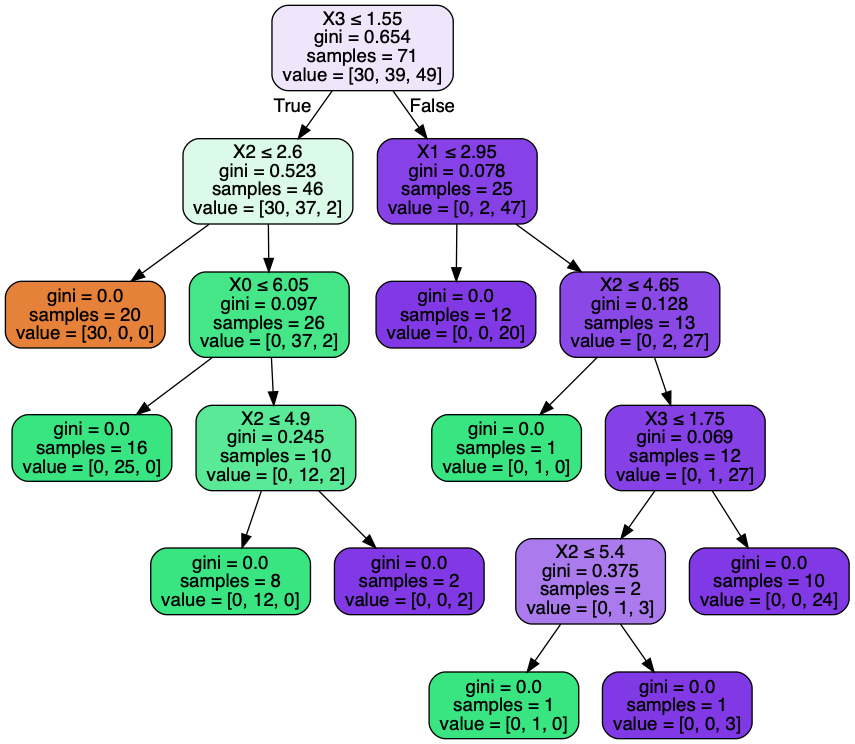

In [9]:
#Plotting 1 decision tree as we cannot plot all trees together.
dot_data = StringIO()
export_graphviz(classifier[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [10]:
#applying on test dataset
classifier.predict(test[X_feature])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
#predicted probabilities of first few features
classifier.predict_proba(test[X_feature])[0:10]

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ]])

In [12]:
#Assigning back the species name to target values
predictors=iris.target_names[classifier.predict(test[X_feature])]
print(predictors)

#print(test['species'])
#print(len(predictors))

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica']


In [13]:
#confusion matrix
pd.crosstab(test['species'],predictors, rownames=['Acutual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Acutual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [14]:
#Accuracy score using accuracy_score feature
print("Prediction accuracy is:", accuracy_score(test['species'],predictors)*100,"%")

Prediction accuracy is: 93.75 %


In [15]:
#To predict which species the flower belong to by giving manual input instead of test data. 
predictors=iris.target_names[classifier.predict([[0.5,1.0,3.5,5.8]])]
print("Given flower specification belong to:", predictors)

Given flower specification belong to: ['versicolor']
